In [2]:
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
import random
from matplotlib import pyplot
import os
import warnings  
warnings.filterwarnings('ignore')

In [3]:
#Practice using the credit card dataset
df = pd.read_csv('creditcard.csv')

In [4]:
df.shape

(284807, 31)

In [5]:
df.head() #Class = fraudulent or not

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Isolation Forest
* Iso Forest tries to separate each point in the data
    * Normal point: takes more steps to be segregated
    * Anomalous point: only takes a few steps to separate
    
* Important parameters:
    * Contamination: percentage of outlier points

* Available libraries for iso forest:
    * skleran
    * h2o


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
#Specify the 28 columns (from PCA transformation) to be used as inputs
model_columns = df.columns[1:29]

In [12]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100, max_samples='auto', \
                     max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(df[model_columns])

IsolationForest(n_jobs=-1, random_state=42)

In [15]:
pred = clf.predict(df[model_columns])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index=list(outliers.index)

In [17]:
#print(outlier_index)

In [18]:
#Points classified -1 are anomalous
print(df['anomaly'].value_counts())

 1    275142
-1      9665
Name: anomaly, dtype: int64


### Visualize the Results

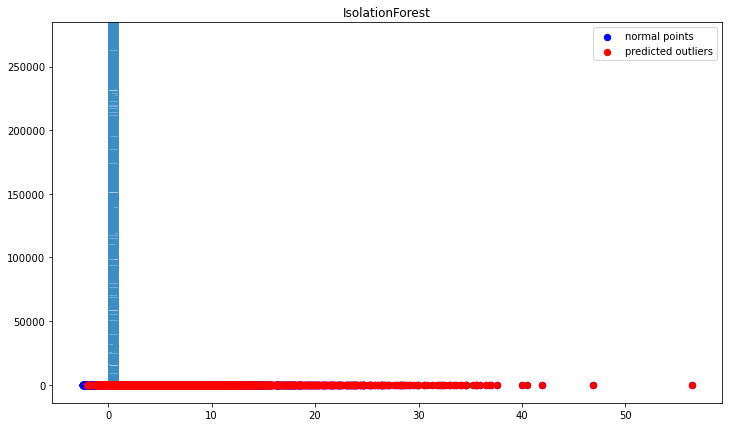

In [21]:
from sklearn.decomposition import PCA
pca = PCA(2) #Reduced to 2 dimensions
pca.fit(df[model_columns])


res=pd.DataFrame(pca.transform(df[model_columns]))

Z = np.array(res)
figsize=(12, 7)
plt.figure(figsize=figsize)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(res[0], res[1], c='blue',
                 s=40,label="normal points")

b1 = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',
                 s=40,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

#### Next step: practice with another dataset that has time as a feature
* Use Time Series to visualize how different features change over time, and if the anomalies actually happen when sudden changes/peaks occur
    * Example: https://www.kaggle.com/code/adithya44/anomaly-detection-isolation-forest-visualization/notebook